In [32]:
#Install and import required libraries
!pip install scikit-learn plotly seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

# Step 1.2: Create directory structure
import os
os.makedirs('visualizations', exist_ok=True)

print("Environment setup completed!")

Environment setup completed!


In [34]:
# If using a file from your computer:
from google.colab import files
uploaded = files.upload()

Saving student-mat (1).csv to student-mat (1) (2).csv


In [35]:
# For demonstration, I'll create a synthetic dataset
np.random.seed(42)
n_students = 300

data = {
    'student_id': range(1, n_students + 1),
    'study_hours': np.random.normal(20, 6, n_students),
    'attendance_rate': np.random.normal(85, 12, n_students),
    'assignment_score': np.random.normal(78, 15, n_students),
    'quiz_score': np.random.normal(75, 14, n_students),
    'final_grade': np.random.normal(76, 12, n_students),
    'online_activity': np.random.normal(65, 18, n_students),
    'resource_usage': np.random.normal(70, 16, n_students)
}

df = pd.DataFrame(data)

In [37]:
# Select numerical features for clustering
print("FEATURE SELECTION AND PREPARATION")

features_for_clustering = [
    'study_hours',
    'attendance_rate',
    'assignment_score',
    'quiz_score',
    'final_grade',
    'online_activity',
    'resource_usage'
]

print("Selected features for clustering:")
for i, feature in enumerate(features_for_clustering, 1):
    print(f"  {i}. {feature}")

X = df[features_for_clustering]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n Features standardized. Shape: {X_scaled.shape}")
print("Standardized features sample:")
print(X_scaled[:5])

FEATURE SELECTION AND PREPARATION
Selected features for clustering:
  1. study_hours
  2. attendance_rate
  3. assignment_score
  4. quiz_score
  5. final_grade
  6. online_activity
  7. resource_usage

 Features standardized. Shape: (300, 7)
Standardized features sample:
[[ 5.11181814e-01 -8.41138965e-01  6.78175914e-01  2.68120434e-01
   3.36282416e-02  7.48359733e-01  1.96845399e+00]
 [-1.35072487e-01 -5.61128442e-01 -1.00939232e+00 -4.87747132e-01
  -5.23031429e-01 -6.04363352e-01 -3.67438312e-02]
 [ 6.64837178e-01  8.00804712e-01  7.91357546e-01 -6.90670072e-02
   3.06905308e-02 -8.76031019e-01 -6.98801471e-01]
 [ 1.55572267e+00  6.58178286e-01  1.27982501e+00  1.17056291e+00
   4.53231676e-01 -4.70027987e-02 -1.52190205e+00]
 [-2.32664344e-01  6.12896104e-04  3.32900642e-01  9.19780795e-02
  -4.30156406e-02 -2.16720752e-01 -1.81772207e+00]]


DIMENSIONALITY REDUCTION WITH PCA


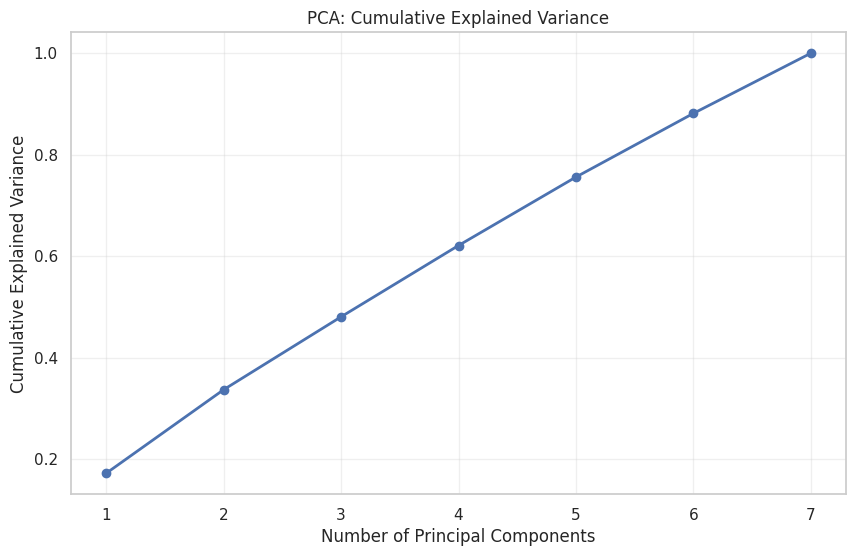

PCA Explained Variance:
PC1: 0.173 (0.173 cumulative)
PC2: 0.165 (0.337 cumulative)
PC3: 0.144 (0.481 cumulative)
PC4: 0.140 (0.621 cumulative)
PC5: 0.135 (0.756 cumulative)
PC6: 0.125 (0.881 cumulative)
PC7: 0.119 (1.000 cumulative)

 First 2 components explain 33.72% of variance


In [38]:
# Apply PCA for visualization
print("DIMENSIONALITY REDUCTION WITH PCA")

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.savefig('visualizations/pca_variance.png', dpi=300, bbox_inches='tight')
plt.show()

print("PCA Explained Variance:")
for i, (var, cum_var) in enumerate(zip(pca.explained_variance_ratio_,
                                      pca.explained_variance_ratio_.cumsum())):
    print(f"PC{i+1}: {var:.3f} ({cum_var:.3f} cumulative)")

# Use first 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\n First 2 components explain {pca_2d.explained_variance_ratio_.sum():.2%} of variance")

DETERMINING OPTIMAL CLUSTER COUNT


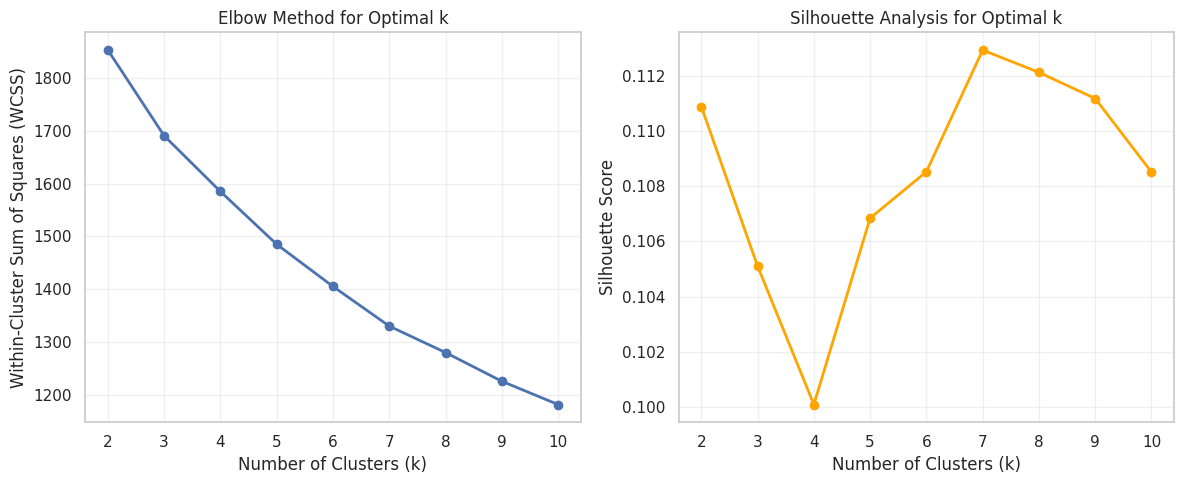

 Selected optimal number of clusters: 4


In [39]:
# Elbow Method for optimal K
print("DETERMINING OPTIMAL CLUSTER COUNT")

wcss = []  # Within-cluster sum of squares
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linewidth=2, color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/optimal_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# Choose optimal k
optimal_k = 4  # Based on elbow point and silhouette score
print(f" Selected optimal number of clusters: {optimal_k}")

In [40]:
# Apply K-Means clustering
print(f"APPLYING K-MEANS CLUSTERING WITH k={optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
df['cluster'] = cluster_labels

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, cluster_labels)

print(f"K-Means clustering completed!")
print(f"Silhouette Score: {sil_score:.3f}")
print("\nCluster Distribution:")
print(df['cluster'].value_counts().sort_index())

APPLYING K-MEANS CLUSTERING WITH k=4
K-Means clustering completed!
Silhouette Score: 0.100

Cluster Distribution:
cluster
0    67
1    80
2    82
3    71
Name: count, dtype: int64


EXPERIMENTING WITH DBSCAN


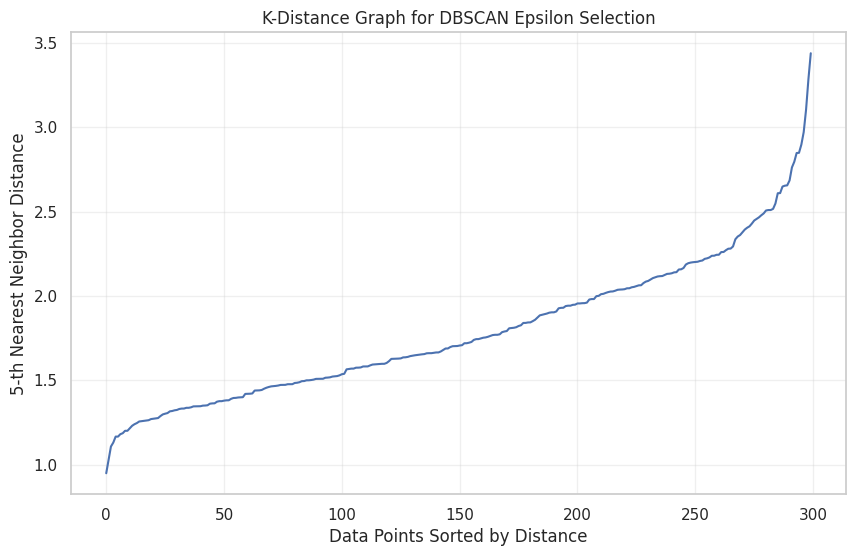

DBSCAN Results:
  - Number of clusters: 0
  - Number of noise points: 300
  - Cluster distribution: (array([-1]), array([300]))


In [41]:
# DBSCAN experimentation
print("EXPERIMENTING WITH DBSCAN")

# Find optimal epsilon using k-distance graph
def find_optimal_eps(X, min_samples):
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, -1], axis=0)
    return distances

# Plot k-distance graph
min_samples = 5
distances = find_optimal_eps(X_scaled, min_samples)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('K-Distance Graph for DBSCAN Epsilon Selection')
plt.grid(True, alpha=0.3)
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Analyze DBSCAN results
unique_labels = np.unique(dbscan_labels)
n_clusters_dbscan = len(unique_labels) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN Results:")
print(f"  - Number of clusters: {n_clusters_dbscan}")
print(f"  - Number of noise points: {n_noise}")
print(f"  - Cluster distribution: {np.unique(dbscan_labels, return_counts=True)}")

Explained variance ratio: [0.17255424 0.16463355]


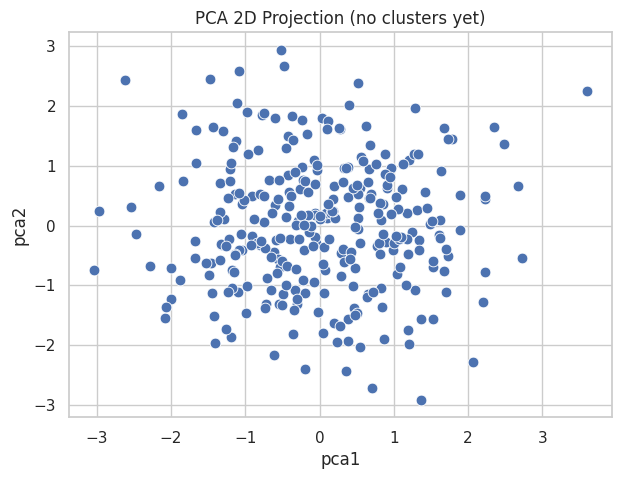

In [49]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

df['pca1'] = X_pca[:,0]
df['pca2'] = X_pca[:,1]

plt.figure(figsize=(7,5))
sns.scatterplot(x='pca1', y='pca2', data=df, s=60)
plt.title("PCA 2D Projection (no clusters yet)")
plt.show()



CLUSTER PROFILE BAR PLOT


<Figure size 1400x800 with 0 Axes>

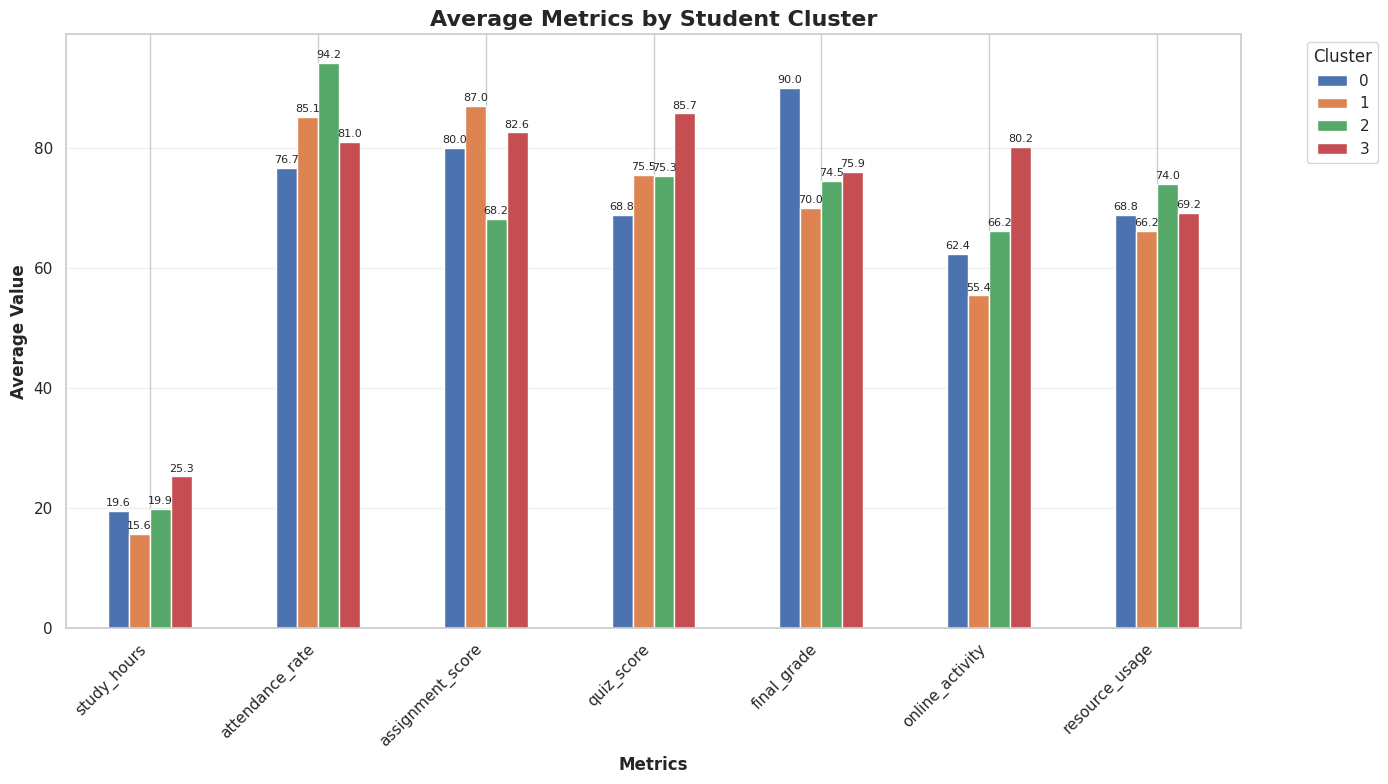

In [42]:
print("\nCLUSTER PROFILE BAR PLOT")

plt.figure(figsize=(14, 8))

# Calculate mean values for each cluster
cluster_means = df.groupby('cluster')[features_for_clustering].mean()

# Create bar plot
cluster_means.T.plot(kind='bar', figsize=(14, 8))

# Customize the plot
plt.title('Average Metrics by Student Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Average Value', fontsize=12, fontweight='bold')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid
plt.grid(True, alpha=0.3, axis='y')

# Add value annotations on bars
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=2)

plt.tight_layout()
plt.savefig('cluster_profile_bar.png', dpi=300, bbox_inches='tight')
plt.show()

CORRELATION HEATMAP


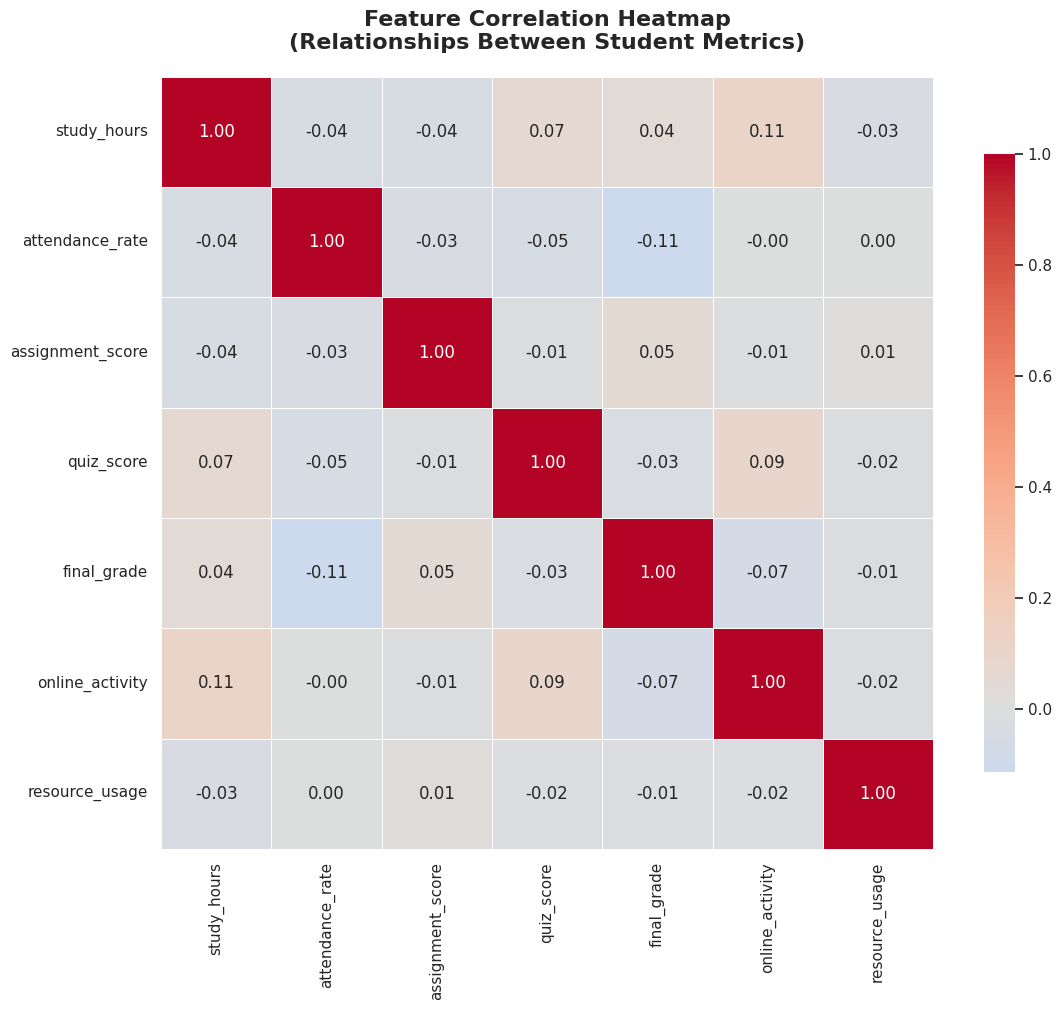

In [43]:
print("CORRELATION HEATMAP")

plt.figure(figsize=(12, 10))

# Calculate correlation matrix
correlation_matrix = df[features_for_clustering].corr()

# Create heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8},
            linewidths=0.5, linecolor='white')

# Customize the plot
plt.title('Feature Correlation Heatmap\n(Relationships Between Student Metrics)',
          fontsize=16, fontweight='bold', pad=20)

# Adjust layout
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
